# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
# Your code here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54 , 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

student_data


,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

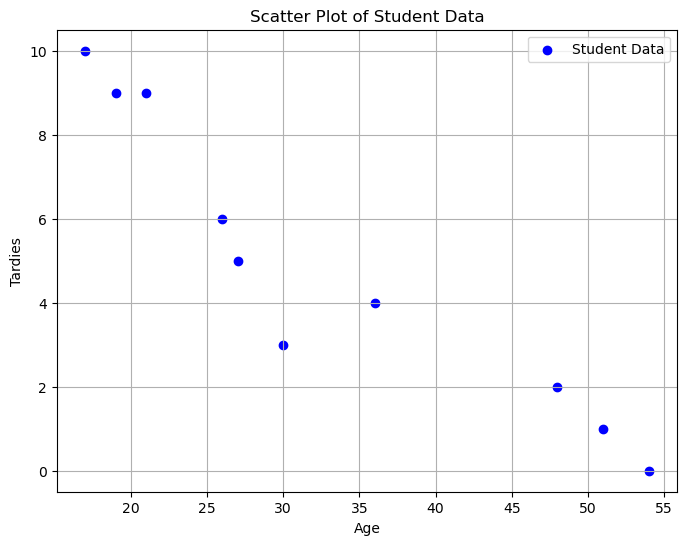

In [3]:
# Your code here.
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.scatter(student_data['Age'], student_data['Tardies'], c='blue', marker='o', label='Student Data')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Scatter Plot of Student Data')

# Add a legend (optional)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
# As the age of the student increases, the number of tardies tends to decrease. This means that older students are less likely to be tardy compared to younger students.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
#correlation:
correlation = student_data['Age'].corr(student_data['Tardies'])
print(f'Correlation: {correlation}')

#covariance:
covariance = student_data['Age'].cov(student_data['Tardies'])
print(f'Covariance: {covariance}')


Correlation: -0.9391626886887122
Covariance: -45.56666666666666


In [6]:
"""
The covariance is negative, indicating that as age increases, tardies tend to decrease.
In this case, a negative correlation would indicate that older students tend to have fewer tardies.
"""

'\nThe covariance is negative, indicating that as age increases, tardies tend to decrease.\nIn this case, a negative correlation would indicate that older students tend to have fewer tardies.\n'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
# Your response here.

model = linear_model.LinearRegression()

# Define the independent variable (predictor) and the dependent variable (outcome)
X = student_data[['Age']]  # Use double brackets to pass a DataFrame
y = student_data['Tardies']

# Fit the Linear Regression model
result = model.fit(X, y)

# Display the intercept and coefficient
intercept = result.intercept_
coefficient = result.coef_[0]

# Print the intercept and coefficient
print(f'Intercept: {intercept}')
print(f'Coefficient (Age): {coefficient}')

Intercept: 12.888803363135768
Coefficient (Age): -0.2428207709159808


Plot your regression model on your scatter plot.

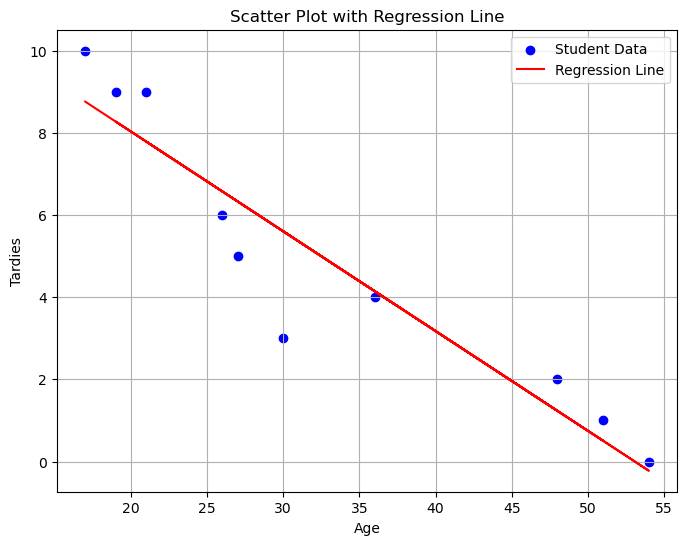

In [8]:
# Your code here.
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(student_data['Age'], student_data['Tardies'], c='blue', marker='o', label='Student Data')

# Plot the regression line
x_values = np.array(student_data['Age'])
y_values = intercept + coefficient * x_values
plt.plot(x_values, y_values, c='red', label='Regression Line')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Scatter Plot with Regression Line')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

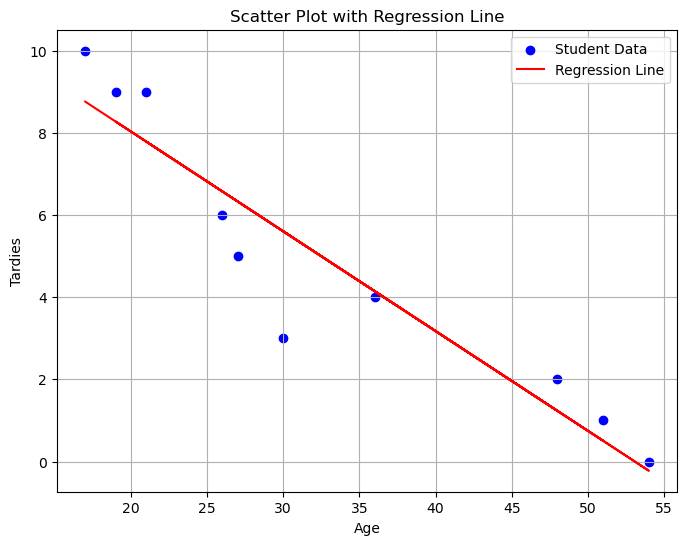

In [9]:
# Your response here. 
plt.figure(figsize=(8, 6))
plt.scatter(student_data['Age'], student_data['Tardies'], c='blue', marker='o', label='Student Data')

# Plot the regression line
x_values = np.array(student_data['Age'])
y_values = intercept + coefficient * x_values
plt.plot(x_values, y_values, c='red', label='Regression Line')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Scatter Plot with Regression Line')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [10]:
'''
The model provides insights into the relationship between age and tardies. The coefficient for age indicates that as a student's age increases, the number of tardies is expected to decrease. This suggests that age is a predictor of tardiness, and older students are less likely to be tardy.
'''

"\nThe model provides insights into the relationship between age and tardies. The coefficient for age indicates that as a student's age increases, the number of tardies is expected to decrease. This suggests that age is a predictor of tardiness, and older students are less likely to be tardy.\n"

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [20]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [21]:
# Your response here. 
selected_columns = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
data = vehicles[selected_columns]

# Calculate the correlations
correlations = data.corr()

# Display the correlations
print(correlations['CO2 Emission Grams/Mile'])

"""
Fuel Barrels/Year' has the highest positive correlation with 'CO2 Emission Grams/Mile.' This indicates that the amount of fuel consumed per year has a strong positive relationship with CO2 emissions. In other words, the more fuel a vehicle consumes, the higher its CO2 emissions are likely to be.
'Combined MPG' has the highest negative correlation with 'CO2 Emission Grams/Mile.' This suggests that higher fuel efficiency (measured by higher combined miles per gallon) is associated with lower CO2 emissions.
"""

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [22]:
# Your response here. 
# Define the independent variables (predictors)
X = data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

# Define the dependent variable (outcome)
y = data['CO2 Emission Grams/Mile']

# Create a Linear Regression model
model = linear_model.LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients
coefficients = model.coef_
intercept = model.intercept_
print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]
Intercept: 769.8882836465821


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [23]:
# Your response here. 

print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]
Intercept: 769.8882836465821


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [25]:
# Your code here.

parties = pd.DataFrame({'People_invited':[1,3,4,6,8,9,11,14], 'People_attended': [1,2,4,4,5,7,8,13]})
parties

,People_invited,People_attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

-0.43939393939393945

array([0.84848485])

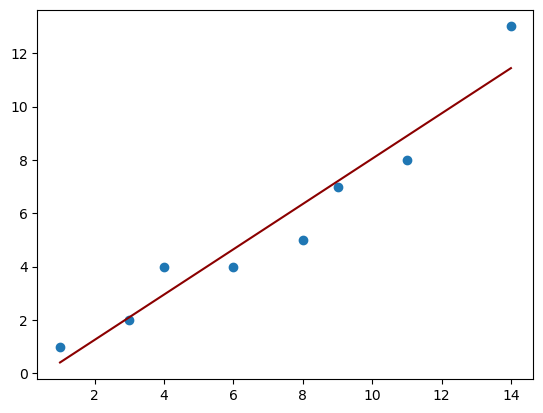

In [29]:
# Your code here.

x = parties[['People_invited']]
y = parties['People_attended']

model = linear_model.LinearRegression()
result = model.fit(x,y)

display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_*x
plt.plot(x, regression_line, c = 'darkred')
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [30]:
# Your response here. 
result.score(x,y)
# The fitted regression line (in red) confirms the positive linear relationship. It shows the expected number of people who attended the party based on the number of people invited.
#  As the number of people invited increases, the number of people who attended tends to increase as well. This suggests that there is a positive correlation between the two variables.

0.9316696375519905

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [32]:
# Your response here. 
parties_2 = pd.DataFrame({'People_invited':[1,3,4,6,8,9,11], 'People_attending': [1,2,4,4,5,7,8]})
parties_2

x = parties_2[["People_invited"]]
y = parties_2["People_attending"]

model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)


0.32330827067669077

array([0.68421053])

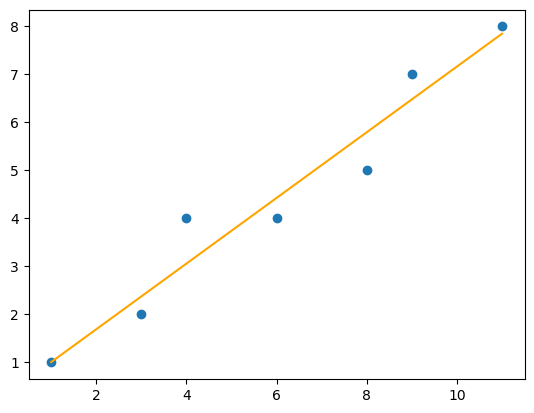

In [33]:
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [19]:
# Your response here. 
# Without the outliner now the regression line is more centralized, following better "middle" of the values, making it more correct to the values.
